In [46]:
# Import Meteostat library and dependencies
from datetime import datetime
import matplotlib.pyplot as plt
# from meteostat import Point, Monthly, units, Daily, Stations, Normals
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt 
from matplotlib.pylab import rcParams
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid',font='Arial',font_scale=1.2)
rcParams['figure.figsize'] = 12,8
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
import scipy.stats as st
import time
import requests
from scipy.stats import linregress
from time import mktime
from pytz import utc, timezone
import webbrowser

In [47]:
disasterdata_path="all_data_combined.csv"
disaster_df = pd.read_csv(disasterdata_path)

In [48]:
file_path="output_data/temp_co2.csv"
df = pd.read_csv(file_path)

In [49]:
labels = ["Unnamed: 0"]
df.drop(columns = labels, inplace=True)
# disaster_df.drop(columns = labels, inplace=True)

In [50]:
disaster_df.head(1)

,Unnamed: 0,All natural disasters (Occurrence),Drought (Occurrence),Earthquake (Occurrence),Extreme temperature (Occurrence),Extreme weather (Occurrence),Flood (Occurrence),Impact (Occurrence),Landslide (Occurrence),Mass movement (dry) (Occurrence),...,LandAndOceanAverageTemperatureUncertainty,SP500,Dividend,Earnings,Consumer Price Index,Long Interest Rate,Real Price,Real Dividend,Real Earnings,PE10
0,1900,5.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.15025,6.1475,0.259167,0.48,7.81,3.1275,196.724167,8.291667,15.3575,18.57


In [51]:
disaster_df.drop(['Earthquake (Occurrence)', 'Impact (Occurrence)', 'Landslide (Occurrence)',
                       'Mass movement (dry) (Occurrence)', 'Volcanic activity (Occurrence)',
                       'LandAndOceanAverageTemperatureUncertainty', 'SP500', 'Dividend', 'Earnings',
                      'Consumer Price Index', 'Long Interest Rate', 'LandAverageTemperature',
                      'LandAverageTemperatureUncertainty', 'LandMaxTemperature', 'LandMaxTemperatureUncertainty',
                      'LandMinTemperature', 'LandMinTemperatureUncertainty', 'LandAndOceanAverageTemperature',
                       'Real Price', 'Real Dividend', 'PE10', 'Real Earnings'], axis = 1, inplace=True)

In [52]:
disaster_df.columns

Index(['Unnamed: 0', 'All natural disasters (Occurrence)',
       'Drought (Occurrence)', 'Extreme temperature (Occurrence)',
       'Extreme weather (Occurrence)', 'Flood (Occurrence)',
       'Wildfire (Occurrence)'],
      dtype='object')

In [186]:
# # RENAME COLUMNS
disaster_df.columns = ['Year', 'All Natural Disaster',
       'Drought', 'Extreme Temperature',
       'Extreme Weather', 'Flood',
       'Wildfire']

In [187]:
disaster_df.head()

,Year,All Natural Disaster,Drought,Extreme Temperature,Extreme Weather,Flood,Wildfire
0,1900,5.0,2.0,0.0,1.0,1.0,0.0
1,1901,2.0,0.0,0.0,0.0,0.0,0.0
2,1902,9.0,0.0,0.0,1.0,0.0,0.0
3,1903,8.0,1.0,0.0,2.0,2.0,0.0
4,1904,2.0,0.0,0.0,1.0,0.0,0.0


In [188]:
df.head(1)

,Year,CO2(ppm),Temp
0,1750,277.03,8.719364


In [189]:
# # MERGE Temp_CO2 & Disaster dataframes
df2 = pd.merge(df,disaster_df, how="left", on="Year")

In [190]:
df2.shape

(266, 9)

In [191]:
#Drop years without disaster data (NaN rows)
df2.dropna(axis = 0, how ='any', inplace=True)
df2.shape

(116, 9)

In [215]:
# # # REF--------REF--------REF--------REF--------REF--------REF--------
# # SEABORN plotting method
# sns.scatterplot(x="Year",y="All Natural Disaster",data=df2);

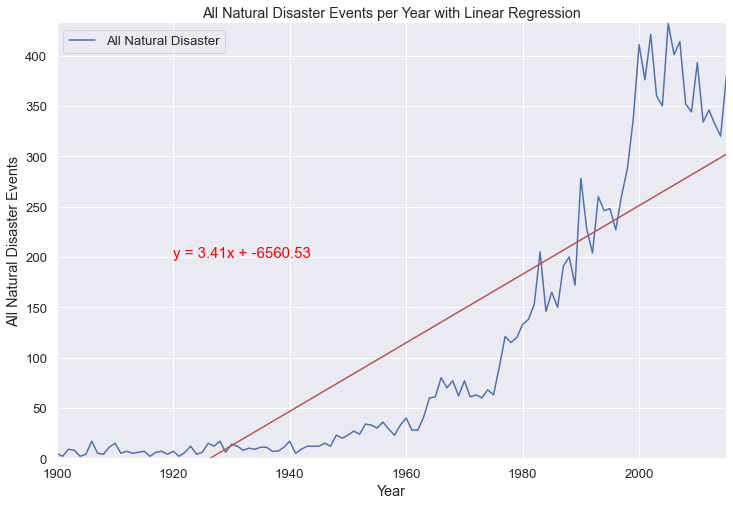

In [204]:
dist_col_indx = 3

x_axis = df2.iloc[:,0]
y_axis = df2.iloc[:,dist_col_indx]

y_name=df2.columns[dist_col_indx]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = df2.iloc[:,0] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

df2.plot.line(x="Year", y=df2.columns[dist_col_indx])

# Sets the x limits of the current chart
plt.xlim(min(x_axis), max(x_axis)+0)
              
# Sets the y limits of the current chart
plt.ylim(0, max(y_axis)+0)

plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(1920,200),fontsize=15,color="red")

# Give our chart some labels and a tile
plt.title(f"{y_name} Events per Year with Linear Regression")
plt.xlabel("Year")
plt.ylabel(f"{y_name} Events");

plt.savefig(f'../png_data/{y_name}_year_HYC.png')

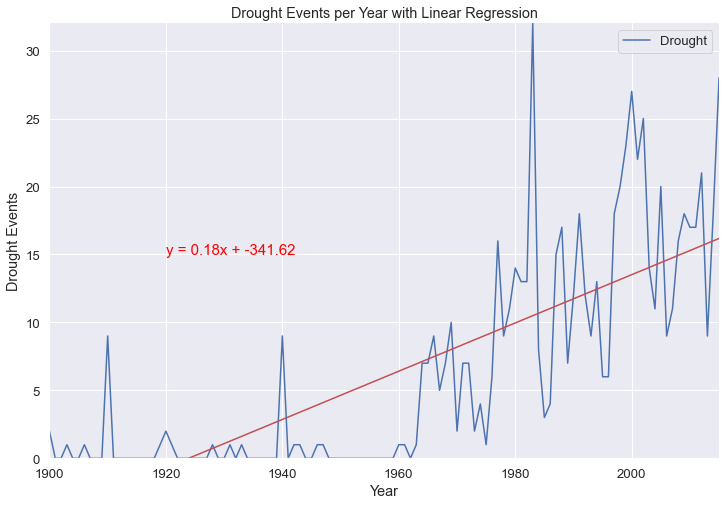

In [205]:
dist_col_indx = 4

x_axis = df2.iloc[:,0]
y_axis = df2.iloc[:,dist_col_indx]

y_name=df2.columns[dist_col_indx]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = df2.iloc[:,0] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

df2.plot.line(x="Year", y=df2.columns[dist_col_indx])

# Sets the x limits of the current chart
plt.xlim(min(x_axis), max(x_axis)+0)
              
# Sets the y limits of the current chart
plt.ylim(0, max(y_axis)+0)

plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(1920,15),fontsize=15,color="red")

# Give our chart some labels and a tile
plt.title(f"{y_name} Events per Year with Linear Regression")
plt.xlabel("Year")
plt.ylabel(f"{y_name} Events");

plt.savefig(f'../png_data/{y_name}_year_HYC.png')

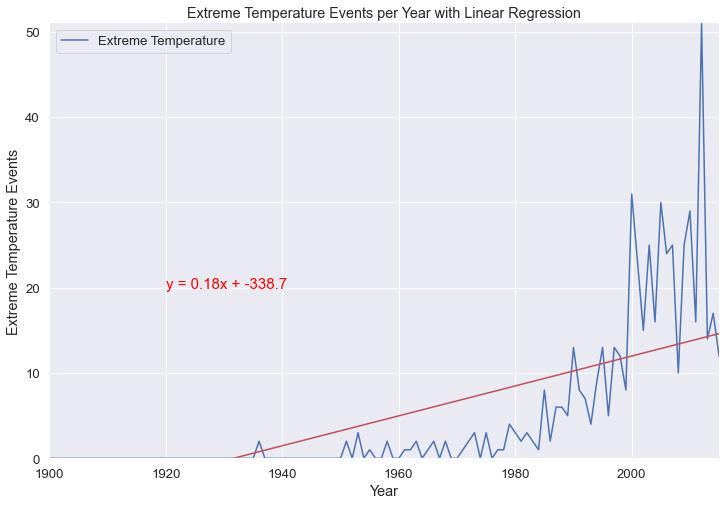

In [206]:
dist_col_indx = 5

x_axis = df2.iloc[:,0]
y_axis = df2.iloc[:,dist_col_indx]

y_name=df2.columns[dist_col_indx]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = df2.iloc[:,0] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

df2.plot.line(x="Year", y=df2.columns[dist_col_indx])

# Sets the x limits of the current chart
plt.xlim(min(x_axis), max(x_axis)+0)
              
# Sets the y limits of the current chart
plt.ylim(0, max(y_axis)+0)

plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(1920,20),fontsize=15,color="red")

# Give our chart some labels and a tile
plt.title(f"{y_name} Events per Year with Linear Regression")
plt.xlabel("Year")
plt.ylabel(f"{y_name} Events");

plt.savefig(f'../png_data/{y_name}_year_HYC.png')

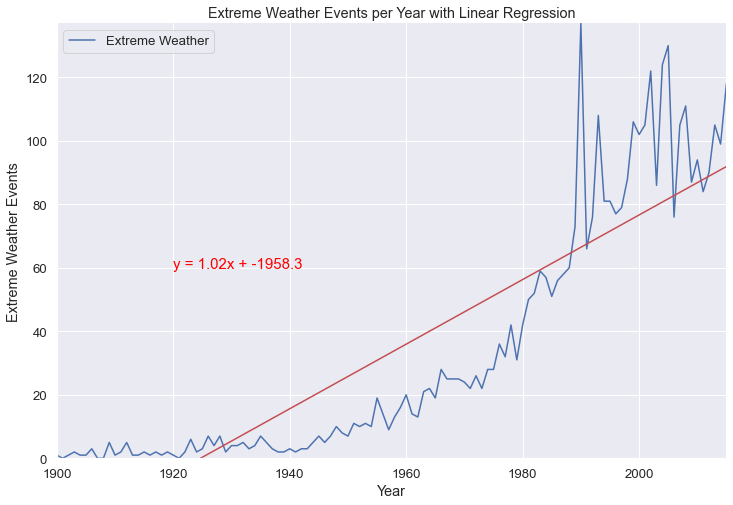

In [208]:
dist_col_indx = 6

x_axis = df2.iloc[:,0]
y_axis = df2.iloc[:,dist_col_indx]

y_name=df2.columns[dist_col_indx]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = df2.iloc[:,0] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

df2.plot.line(x="Year", y=df2.columns[dist_col_indx])

# Sets the x limits of the current chart
plt.xlim(min(x_axis), max(x_axis)+0)
              
# Sets the y limits of the current chart
plt.ylim(0, max(y_axis)+0)

plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(1920,60),fontsize=15,color="red")

# Give our chart some labels and a tile
plt.title(f"{y_name} Events per Year with Linear Regression")
plt.xlabel("Year")
plt.ylabel(f"{y_name} Events");

plt.savefig(f'../png_data/{y_name}_year_HYC.png')

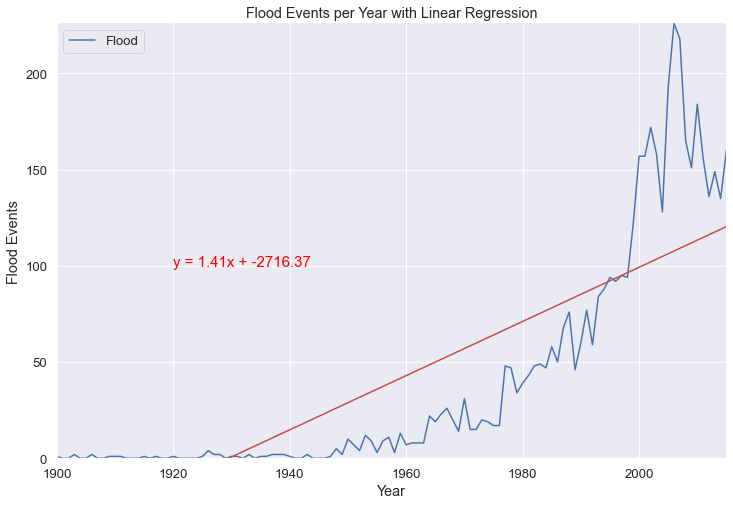

In [225]:
dist_col_indx = 7

x_axis = df2.iloc[:,0]
y_axis = df2.iloc[:,dist_col_indx]

y_name=df2.columns[dist_col_indx]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = df2.iloc[:,0] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

df2.plot.line(x="Year", y=df2.columns[dist_col_indx])

# Sets the x limits of the current chart
plt.xlim(min(x_axis), max(x_axis)+0)
              
# Sets the y limits of the current chart
plt.ylim(0, max(y_axis)+0)

plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(1920,100),fontsize=15,color="red")

# Give our chart some labels and a tile
plt.title(f"{y_name} Events per Year with Linear Regression")
plt.xlabel("Year")
plt.ylabel(f"{y_name} Events");

plt.savefig(f'../png_data/{y_name}_year_HYC.png')

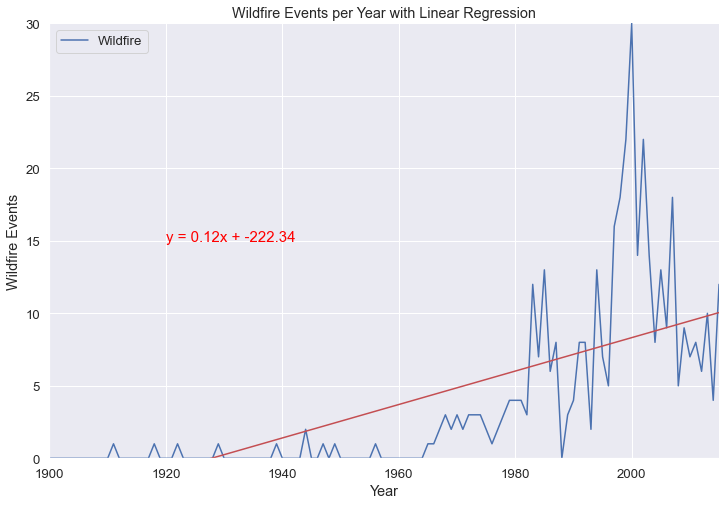

In [211]:
dist_col_indx = 8

x_axis = df2.iloc[:,0]
y_axis = df2.iloc[:,dist_col_indx]

y_name=df2.columns[dist_col_indx]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = df2.iloc[:,0] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

df2.plot.line(x="Year", y=df2.columns[dist_col_indx])

# Sets the x limits of the current chart
plt.xlim(min(x_axis), max(x_axis)+0)
              
# Sets the y limits of the current chart
plt.ylim(0, max(y_axis)+0)

plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(1920,15),fontsize=15,color="red")

# Give our chart some labels and a tile
plt.title(f"{y_name} Events per Year with Linear Regression")
plt.xlabel("Year")
plt.ylabel(f"{y_name} Events");

plt.savefig(f'../png_data/{y_name}_year_HYC.png')

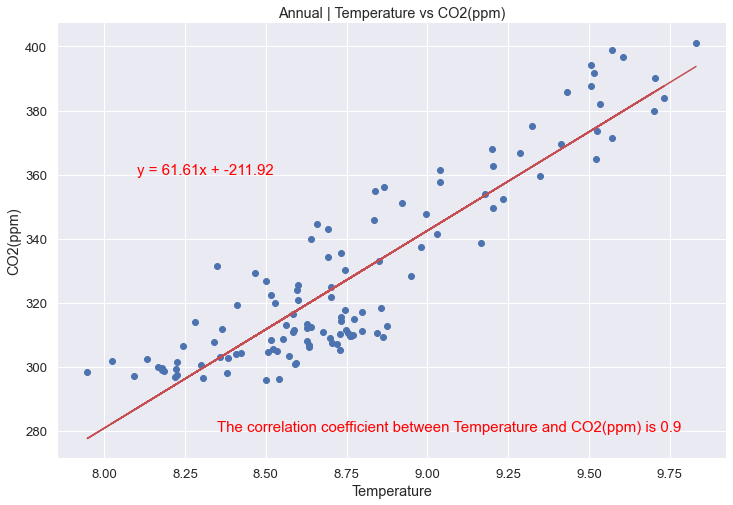

In [240]:
temp = df2.iloc[:,2]
co2 = df2.iloc[:,1]

plt.scatter(temp, co2)

corr_coef = f"The correlation coefficient between Temperature and CO2(ppm) is {round(st.pearsonr(temp,co2)[0],2)}"

(slope, intercept, rvalue, pvalue, stderr) = linregress(temp, co2)
regress_values = temp * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(temp, regress_values,"r-")
plt.annotate(line_eq,(8.1,360),fontsize=15,color="red")
plt.annotate(corr_coef,(8.35,280),fontsize=15,color="red")

plt.title("Annual | Temperature vs CO2(ppm)")
plt.xlabel('Temperature')
plt.ylabel('CO2(ppm)')
plt.savefig(f'../png_data/Temp_CO2_HYC.png')
plt.show()

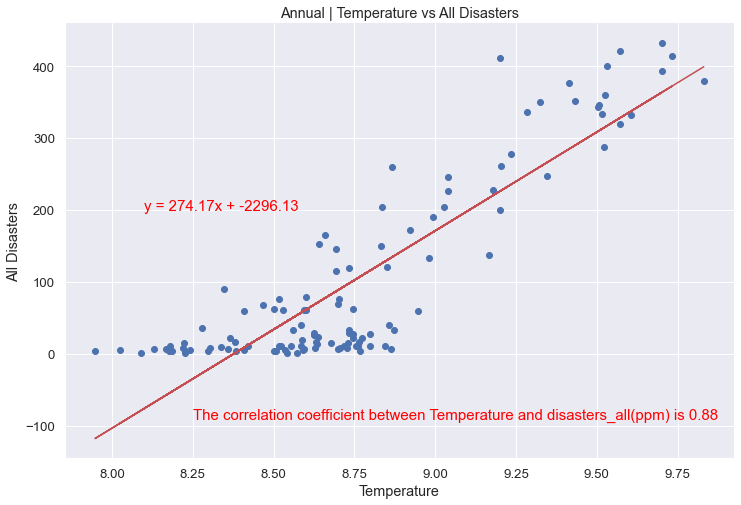

In [243]:
temp = df2.iloc[:,2]
disasters_all = df2.iloc[:,3]

plt.scatter(temp, disasters_all)

corr_coef = f"The correlation coefficient between Temperature and All Disasters is {round(st.pearsonr(temp,disasters_all)[0],2)}"

(slope, intercept, rvalue, pvalue, stderr) = linregress(temp, disasters_all)
regress_values = temp * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(temp, regress_values,"r-")
plt.annotate(line_eq,(8.1,200),fontsize=15,color="red")
plt.annotate(corr_coef,(8.25,-90),fontsize=15,color="red")

plt.title("Annual | Temperature vs All Disasters")
plt.xlabel('Temperature')
plt.ylabel('All Disasters')
plt.savefig(f'../png_data/Temp_disastersALL_HYC.png')
plt.show()

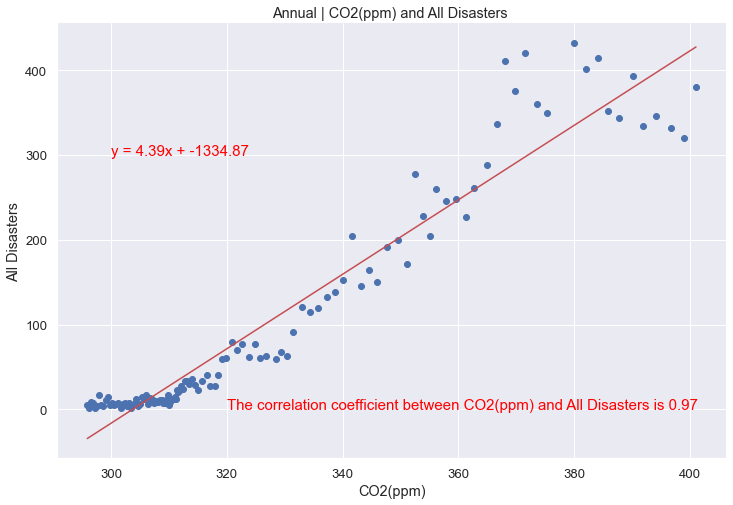

In [247]:
co2 = df2.iloc[:,1]
disasters_all = df2.iloc[:,3]

plt.scatter(co2, disasters_all)

corr_coef = f"The correlation coefficient between CO2(ppm) and All Disasters is {round(st.pearsonr(co2,disasters_all)[0],2)}"

(slope, intercept, rvalue, pvalue, stderr) = linregress(co2, disasters_all)
regress_values = co2 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(co2, regress_values,"r-")
plt.annotate(line_eq,(300,300),fontsize=15,color="red")
plt.annotate(corr_coef,(320,0),fontsize=15,color="red")

plt.title("Annual | CO2(ppm) and All Disasters ")
plt.xlabel('CO2(ppm)')
plt.ylabel('All Disasters')
plt.savefig(f'../png_data/co2_disastersALL_HYC.png')
plt.show()

In [248]:
!git status

On branch hamilton
Changes not staged for commit:
  (use "git add/rm <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   EDA.ipynb
	deleted:    KEM_Temp_CO2_V2.ipynb
	modified:   KEM_Temp_CO2_V3_HYC_12042021.ipynb
	modified:   ../pollution by country_stateofglobalair/pollution.ipynb
	modified:   ../pollution by country_stateofglobalair/ref.txt

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	KEM_Temp_CO2_V2_WILLrepair.ipynb
	Temp_CO2_Disaster_v0-hyc12042021.ipynb
	combined_disasters_temps.csv
	data_natural_disasters/
	disasters.csv
	output_data/
	../png_data/All Natural Disaster_year_HYC.png
	../png_data/All natural disasters_year_HYC.png
	../png_data/Drought_year_HYC.png
	../png_data/Extreme Temperature_year_HYC.png
	../png_data/Extreme Weather_year_HYC.png
	../png_data/Flood_year_HYC.png
	../png_data/Temp_CO2_HYC.png
	../png_data/Temp_disastersALL_HYC.png
	../png_data/Wild